<div style="border:solid Chocolate 2px; padding: 40px">

### Project Description

The telecommunications company "TeleDom" aims to reduce customer churn. To achieve this, they plan to offer special promotions and promo codes to customers who may terminate their contracts. To predict which customers are likely to cancel services, the company wants to develop a machine learning model. The goal of this project is to train a model based on customer data and their services to forecast customer churn.

<div style="border:solid Chocolate 2px; padding: 40px">

### Project Plan:

1. **Data Loading**
    - Load the data from the provided files.
    - Perform an initial inspection of each dataframe.

2. **Exploratory Data Analysis (EDA) and Preprocessing**
    - Analyze data for each dataframe.
    - Detect missing values, anomalies, and inconsistencies.
    - Decide on the necessary features for the model and perform preprocessing (e.g., removing/filling missing values, transforming categorical data).

3. **Data Merging**
    - Merge all available data files on the key column `customerID` into one unified dataframe.

4. **Analysis and Preprocessing of Merged Data**
    - Visualize feature distributions using histograms, box plots, and correlation matrices.
    - Assess the relationship between features and the target variable.
    - Generate new features if necessary.

5. **Data Preparation for Modeling**
    - Split the data into training and test sets.
    - Scale numerical features and encode categorical features.
    - Handle missing data appropriately.

6. **Model Training**
    - Train multiple machine learning models (e.g., logistic regression, random forest, gradient boosting).
    - Tune hyperparameters of at least one model to improve its performance.

7. **Model Selection**
    - Evaluate model performance on the test set using key metrics (e.g., accuracy, ROC-AUC).
    - Choose the best-performing model based on predictive accuracy.

8. **Conclusion and Business Recommendations**
    - Summarize the project results: which models were used, and their outcomes.
    - Provide actionable business recommendations based on the model's results to reduce customer churn.

</div>

<div style="border:solid Chocolate 2px; padding: 40px">

### 1. Data Loading

In [1]:
import os
import pandas as pd
import numpy as np

import phik
from phik.report import plot_correlation_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, make_scorer


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc,precision_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, recall_score

from sklearn.model_selection import GridSearchCV

In [2]:
if os.path.exists("C:/Users/User/Desktop/final project/contract_new.csv"):
    paths = {
        'contract': "C:/Users/User/Desktop/final project/contract_new.csv",
        'internet': "C:/Users/User/Desktop/final project/internet_new.csv",
        'personal': "C:/Users/User/Desktop/final project/personal_new.csv",
        'phone': "C:/Users/User/Desktop/final project/phone_new.csv"
    }
else:
    paths = {
        'contract': "/datasets/contract_new.csv",
        'internet': "/datasets/internet_new.csv",
        'personal': "/datasets/personal_new.csv",
        'phone': "/datasets/phone_new.csv"
    }

dataframes = {}

for name, path in paths.items():
    try:
        dataframes[name] = pd.read_csv(path)
        print(f"File '{name}' successfully loaded.")
    except FileNotFoundError:
        print(f"File '{name}' not found at path: {path}")
    except pd.errors.EmptyDataError:
        print(f"File '{name}' is empty: {path}")
    except Exception as e:
        print(f"Error loading file '{name}': {e}")

for name, df in dataframes.items():
    print(f"\nFirst rows of file '{name}':")
    print(df.head())

File 'contract' successfully loaded.
File 'internet' successfully loaded.
File 'personal' successfully loaded.
File 'phone' successfully loaded.

First rows of file 'contract':
   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5  

First rows of file 'internet':
   custome

In [3]:
contract_df = dataframes['contract']
internet_df = dataframes['internet']
personal_df = dataframes['personal']
phone_df = dataframes['phone']

In [4]:
contract_df.columns = contract_df.columns.str.lower()
internet_df.columns = internet_df.columns.str.lower()
personal_df.columns = personal_df.columns.str.lower()
phone_df.columns = phone_df.columns.str.lower()

print("Information about contract_df:")
contract_df.info()

print("\nInformation about internet_df:")
internet_df.info()

print("\nInformation about personal_df:")
personal_df.info()

print("\nInformation about phone_df:")
phone_df.info()

print("\nMissing values in contract_df:")
print(contract_df.isnull().sum())

print("\nMissing values in internet_df:")
print(internet_df.isnull().sum())

print("\nMissing values in personal_df:")
print(personal_df.isnull().sum())

print("\nMissing values in phone_df:")
print(phone_df.isnull().sum())

print(f"\nNumber of duplicates in contract_df: {contract_df.duplicated().sum()}")
print(f"Number of duplicates in internet_df: {internet_df.duplicated().sum()}")
print(f"Number of duplicates in personal_df: {personal_df.duplicated().sum()}")
print(f"Number of duplicates in phone_df: {phone_df.duplicated().sum()}")

Information about contract_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Information about internet_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecuri

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

The data looks clean, but there are a few issues that need to be corrected:

- The start date and end date of contracts are in `object` type, they need to be converted.
- `total_charges` is also in `object` type, we should convert it to a numerical type.
- `seniorcitizen` is in `int64`, though it represents a category, so it should be changed to `object`.
- There is no target feature, so we'll create one. All `No` values in the target feature will be replaced with `2020-01-01`. (By the way, while working on this project, I initially made a mistake by replacing `No` values with the current date in 2024, which caused the ROC-AUC metric to spike to 99.9%. Afterward, I realized that it should have been replaced with the last contract start date, `begindate`.)

</div>

In [5]:
contract_df['client_left'] = (contract_df['enddate'] != 'No').astype(int)
personal_df['seniorcitizen'] = personal_df['seniorcitizen'].replace({1: 'Yes', 0: 'No'}).astype('object')

print(contract_df.head())
print(personal_df.head())

   customerid   begindate enddate            type paperlessbilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               paymentmethod  monthlycharges totalcharges  client_left  
0           Electronic check           29.85        31.04            0  
1               Mailed check           56.95      2071.84            0  
2               Mailed check           53.85       226.17            0  
3  Bank transfer (automatic)           42.30       1960.6            0  
4           Electronic check           70.70        353.5            0  
   customerid  gender seniorcitizen partner dependents
0  7590-VHVEG  Female            No     Yes         No
1  5575-GNVDE    Male          

In [6]:
contract_df['totalcharges'] = pd.to_numeric(contract_df['totalcharges'], errors='coerce')

print(contract_df['totalcharges'].isnull().sum())

11


In [7]:
contract_df = contract_df.dropna(subset=['totalcharges'])

In [8]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   begindate         7032 non-null   object 
 2   enddate           7032 non-null   object 
 3   type              7032 non-null   object 
 4   paperlessbilling  7032 non-null   object 
 5   paymentmethod     7032 non-null   object 
 6   monthlycharges    7032 non-null   float64
 7   totalcharges      7032 non-null   float64
 8   client_left       7032 non-null   int32  
dtypes: float64(2), int32(1), object(6)
memory usage: 521.9+ KB


In [9]:
contract_df['enddate'] = contract_df['enddate'].replace(['No'], ['2020-02-01'])
print(contract_df[contract_df['enddate'] == 'No'].shape[0])

0


C:\Users\User\AppData\Local\Temp\ipykernel_19688\495559127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_df['enddate'] = contract_df['enddate'].replace(['No'], ['2020-02-01'])


In [10]:
contract_df['begindate'] = pd.to_datetime(contract_df['begindate'], format='%Y-%m-%d')
contract_df['enddate'] = pd.to_datetime(contract_df['enddate'], format='%Y-%m-%d')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   client_left       7032 non-null   int32         
dtypes: datetime64[ns](2), float64(2), int32(1), object(4)
memory usage: 521.9+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_19688\309259482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_df['begindate'] = pd.to_datetime(contract_df['begindate'], format='%Y-%m-%d')
C:\Users\User\AppData\Local\Temp\ipykernel_19688\309259482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_df['enddate'] = pd.to_datetime(contract_df['enddate'], format='%Y-%m-%d')


In [11]:
contract_df['duration'] = (contract_df['enddate'] - contract_df['begindate']).dt.days

C:\Users\User\AppData\Local\Temp\ipykernel_19688\2213379194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_df['duration'] = (contract_df['enddate'] - contract_df['begindate']).dt.days


<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- The target feature has been created.
- All data types have been converted to the appropriate formats.

</div>

<div style="border:solid Chocolate 2px; padding: 40px">

### 2. Exploratory Data Analysis (EDA) and Preprocessing

</div>

In [12]:
print(contract_df.describe())
print(contract_df.describe(include=['object']))
print(internet_df.describe(include=['object']))
print(personal_df.describe(include=['object']))
print(phone_df.describe(include=['object']))

                           begindate                        enddate  \
count                           7032                           7032   
mean   2017-04-28 23:14:44.641638400  2019-10-15 22:19:02.662116096   
min              2013-10-01 00:00:00            2014-06-01 00:00:00   
25%              2015-06-01 00:00:00            2020-02-01 00:00:00   
50%              2017-09-01 00:00:00            2020-02-01 00:00:00   
75%              2019-04-01 00:00:00            2020-02-01 00:00:00   
max              2020-01-01 00:00:00            2020-02-01 00:00:00   
std                              NaN                            NaN   

       monthlycharges  totalcharges  client_left     duration  
count     7032.000000   7032.000000  7032.000000  7032.000000  
mean        64.798208   2118.621822     0.156570   899.961320  
min         18.250000     19.050000     0.000000    28.000000  
25%         35.587500    439.745000     0.000000   276.000000  
50%         70.350000   1345.275000     

In [13]:
fig = px.histogram(contract_df, x='monthlycharges', nbins=30, title='Distribution of MonthlyCharges')
fig.show()
fig = px.histogram(contract_df, x='totalcharges', nbins=30, title='Distribution of TotalCharges')
fig.show()

In [14]:
fig = px.box(contract_df, y='monthlycharges', title='Boxplot for MonthlyCharges')
fig.show()
fig = px.box(contract_df, y='totalcharges', title='Boxplot for TotalCharges')
fig.show()

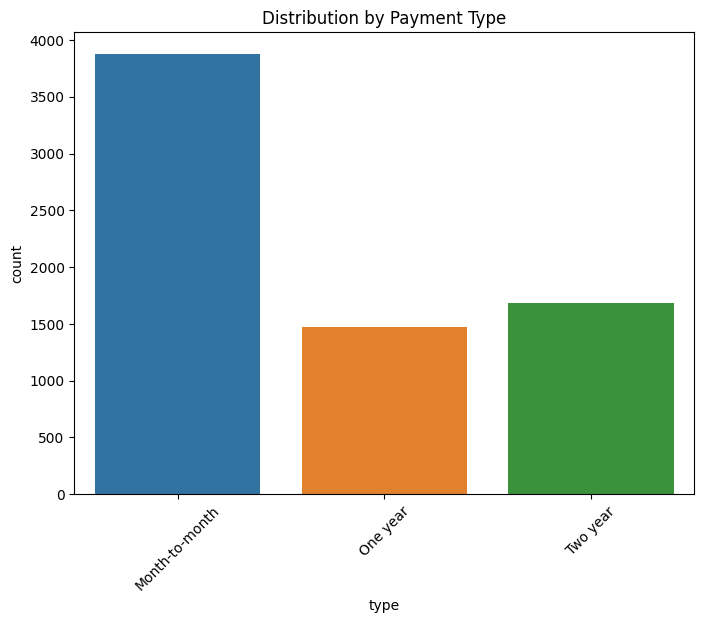

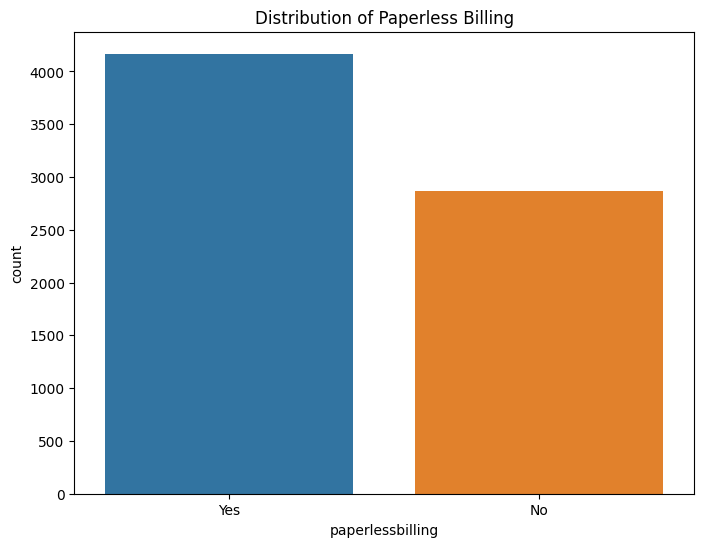

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=contract_df, x='type')
plt.title('Distribution by Payment Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=contract_df, x='paperlessbilling')
plt.title('Distribution of Paperless Billing')
plt.show()

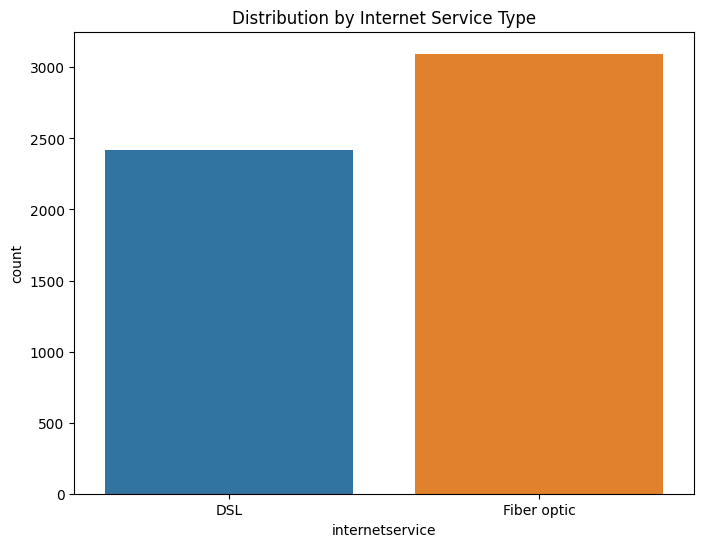

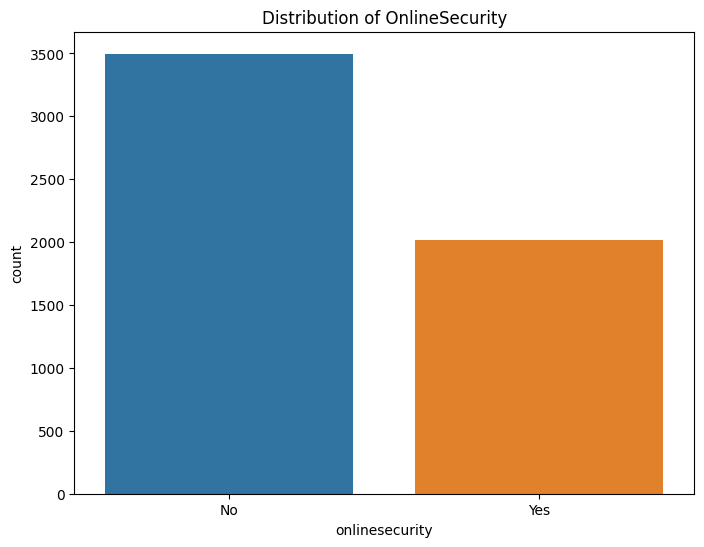

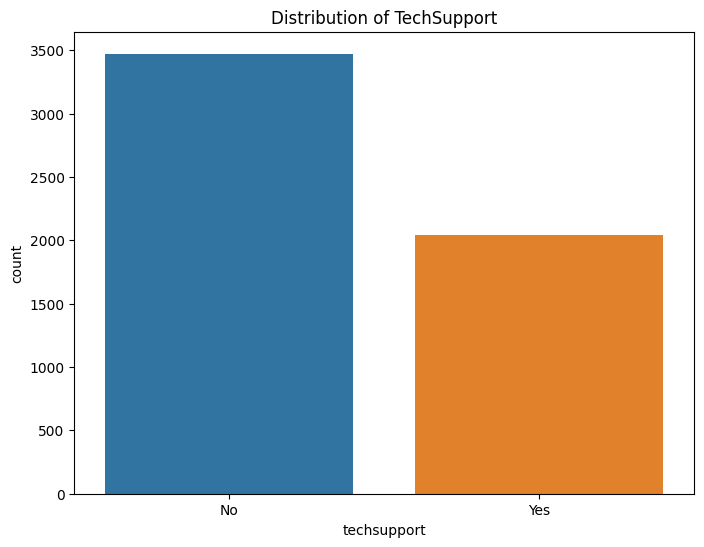

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_df, x='internetservice')
plt.title('Distribution by Internet Service Type')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=internet_df, x='onlinesecurity')
plt.title('Distribution of OnlineSecurity')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=internet_df, x='techsupport')
plt.title('Distribution of TechSupport')
plt.show()

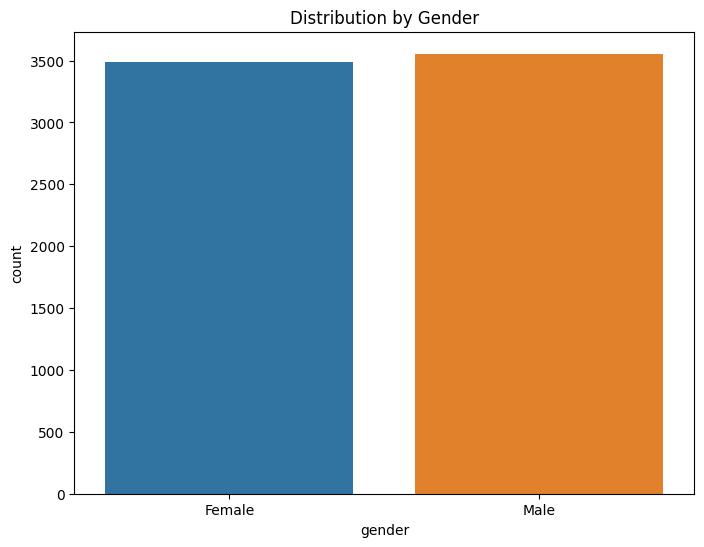

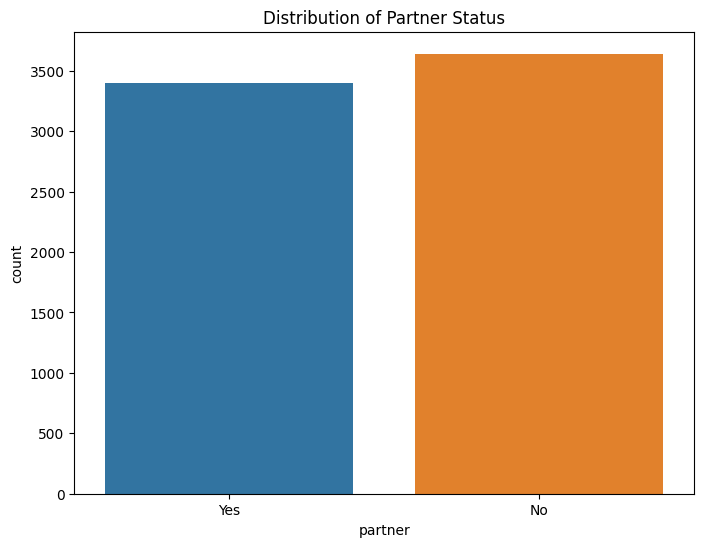

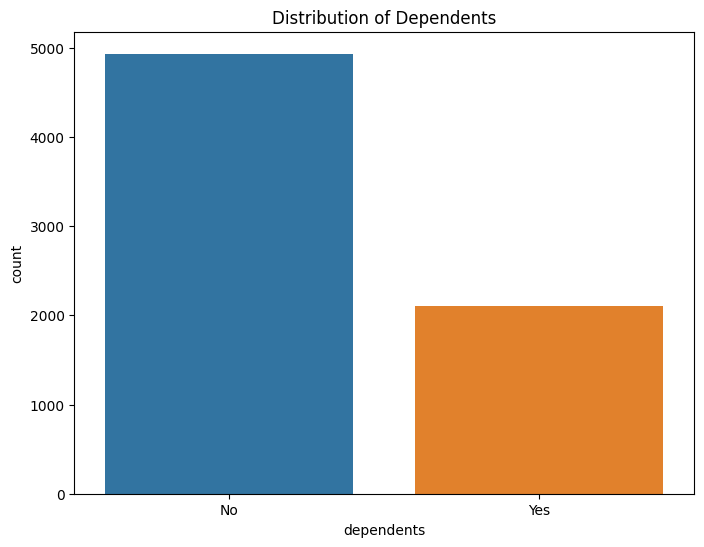

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=personal_df, x='gender')
plt.title('Distribution by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=personal_df, x='partner')
plt.title('Distribution of Partner Status')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=personal_df, x='dependents')
plt.title('Distribution of Dependents')
plt.show()

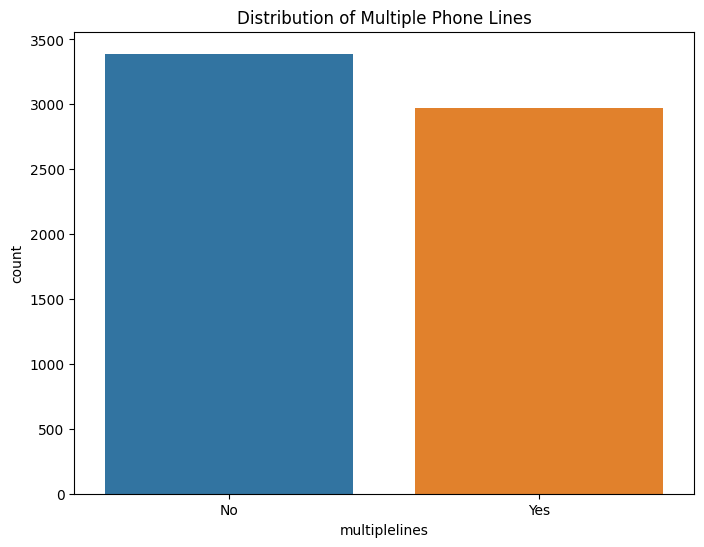

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=phone_df, x='multiplelines')
plt.title('Distribution of Multiple Phone Lines')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- **Customer Expenses Distribution:**

  The distribution of MonthlyCharges shows that most customers pay between 20 and 100 units per month, with a peak around 20-30. This indicates that cheaper plans are popular.
  TotalCharges (total customer expenses) vary widely, reaching values over 9000. This is due to different customers subscribing to various contract types and using services for different lengths of time.

- **Outliers:**

  The boxplot for TotalCharges reveals significant outliers above 6000 units. This may indicate that some customers have been using the operator's services for a long time and have accumulated considerable expenses.
  The boxplot for MonthlyCharges shows no significant outliers, indicating a fairly even distribution of monthly payment amounts.

- **Payment Types:**

  The distribution by payment type shows that more than half of the customers choose a month-to-month payment model. This suggests that customers prefer flexibility and are hesitant to commit to long-term contracts.
  Annual or two-year contracts are less common, indicating that customers may be reluctant to stay tied to the company for extended periods.

- **Paperless Billing:**

  The majority of customers (over 4000) prefer to receive paperless bills, indicating a high level of digitalization and a preference for electronic communication methods.

- **Internet Service:**

  The distribution of internet services shows that most customers use fiber optic connections, which indicates a preference for modern and faster technologies.
  A smaller portion of customers use DSL, which may point to either limited infrastructure or lower demand for this service.

- **Online Security and Tech Support:**

  Less than half of the customers subscribe to online security services and dedicated tech support. This could suggest that these services are either not critically important to customers or they don't perceive sufficient value in them.

- **Demographic Data Distribution:**

  The gender distribution shows a near-equal split between men and women, indicating an equal usage of services across both genders.
  The partner distribution also shows a relatively equal balance, with a slight tilt toward customers without partners.

- **Overall, the data looks clean and does not require further cleaning.**

</div>

<div style="border:solid Chocolate 2px; padding: 40px">

### 3. Data Merging

</div>

In [19]:
merged_df = contract_df.merge(internet_df, on='customerid', how='left')
merged_df = merged_df.merge(personal_df, on='customerid', how='left')
merged_df = merged_df.merge(phone_df, on='customerid', how='left')


print(merged_df.info())

print(merged_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   client_left       7032 non-null   int32         
 9   duration          7032 non-null   int64         
 10  internetservice   5512 non-null   object        
 11  onlinesecurity    5512 non-null   object        
 12  onlinebackup      5512 non-null   object        
 13  deviceprotection  5512 non-null   object        
 14  techsupport       5512 n

In [20]:
services_columns = ['internetservice', 'onlinesecurity', 'onlinebackup', 
                    'deviceprotection', 'techsupport', 'streamingtv', 
                    'streamingmovies', 'multiplelines']
merged_df[services_columns] = merged_df[services_columns].fillna('No')

print(merged_df.isnull().sum())

customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
client_left         0
duration            0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
gender              0
seniorcitizen       0
partner             0
dependents          0
multiplelines       0
dtype: int64


In [21]:
print(merged_df['client_left'].value_counts())

client_left
0    5931
1    1101
Name: count, dtype: int64


<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- **Internet and Phone Services** (internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, multiplelines): 
  The missing values here occur because not all customers use internet and phone services. These gaps should be filled with a value that indicates the absence of these services, i.e., "No".

</div>

<div style="border:solid Chocolate 2px; padding: 40px">

### 4. Analysis and Preprocessing of Merged Data

</div>

In [22]:
merged_df.describe()

begindate                        enddate  \
count                           7032                           7032   
mean   2017-04-28 23:14:44.641638400  2019-10-15 22:19:02.662116096   
min              2013-10-01 00:00:00            2014-06-01 00:00:00   
25%              2015-06-01 00:00:00            2020-02-01 00:00:00   
50%              2017-09-01 00:00:00            2020-02-01 00:00:00   
75%              2019-04-01 00:00:00            2020-02-01 00:00:00   
max              2020-01-01 00:00:00            2020-02-01 00:00:00   
std                              NaN                            NaN   

       monthlycharges  totalcharges  client_left     duration  
count     7032.000000   7032.000000  7032.000000  7032.000000  
mean        64.798208   2118.621822     0.156570   899.961320  
min         18.250000     19.050000     0.000000    28.000000  
25%         35.587500    439.745000     0.000000   276.000000  
50%         70.350000   1345.275000     0.000000   761.000000  
75%         89.862500   3239.317500     0.000000  1461.000000  
max        118.750000   9221.380000     1.000000  2314.000000  
std         30.085974   2112.736199     0.363421   682.738777

In [23]:
print(merged_df['monthlycharges'].head())
print(merged_df['totalcharges'].head())
print(merged_df['duration'].head())

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: monthlycharges, dtype: float64
0      31.04
1    2071.84
2     226.17
3    1960.60
4     353.50
Name: totalcharges, dtype: float64
0      31
1    1036
2     123
3    1371
4     153
Name: duration, dtype: int64


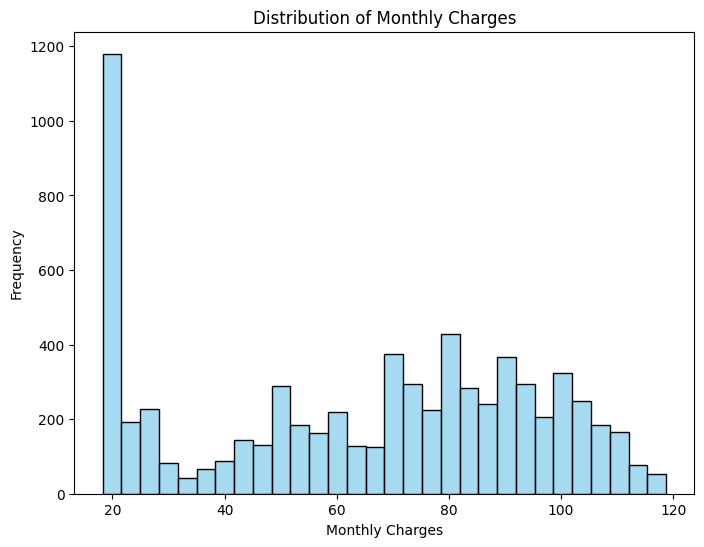

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['monthlycharges'], color='skyblue', bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

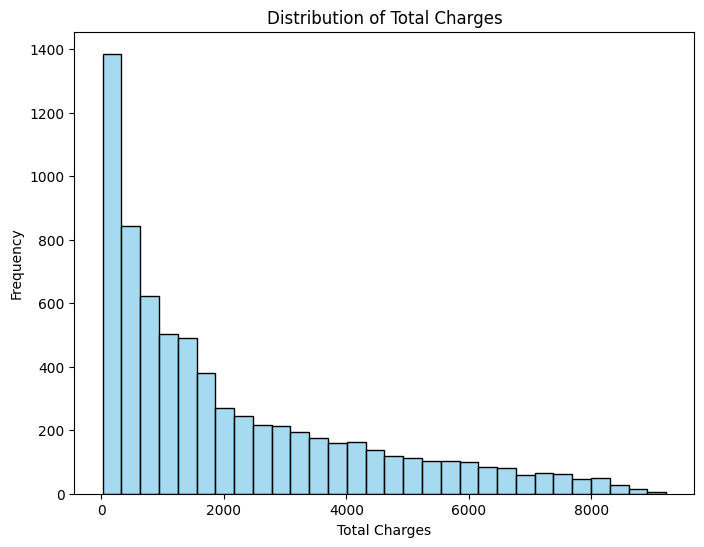

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['totalcharges'], color='skyblue', bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

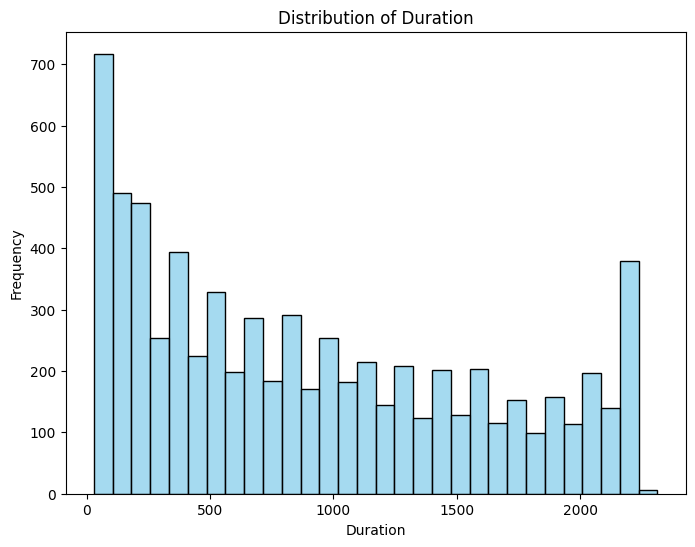

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['duration'], color='skyblue', bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

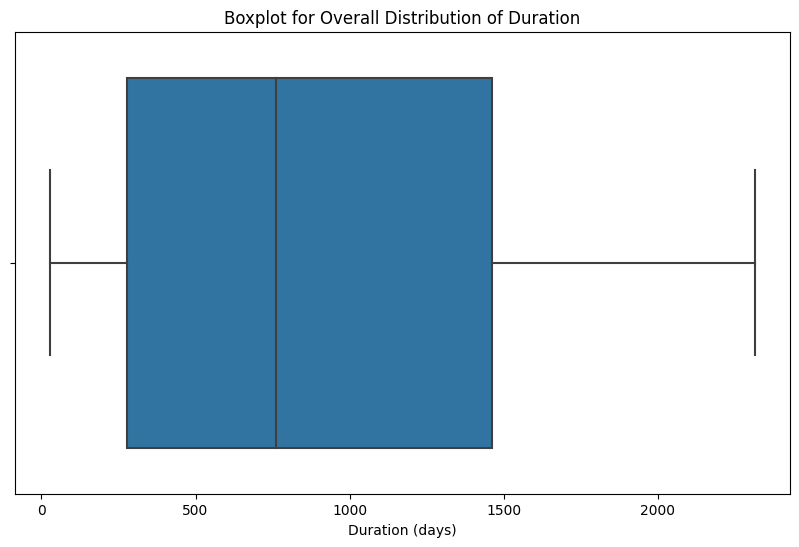

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['duration'])
plt.title('Boxplot for Overall Distribution of Duration')
plt.xlabel('Duration (days)')
plt.show()

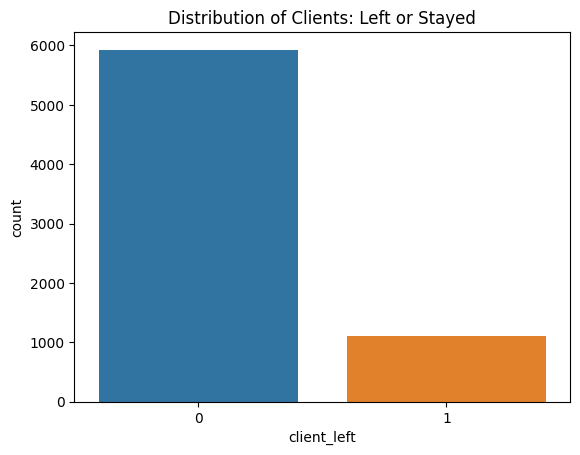

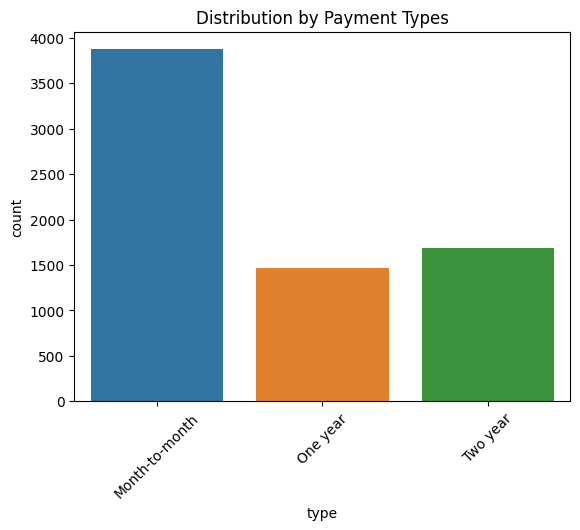

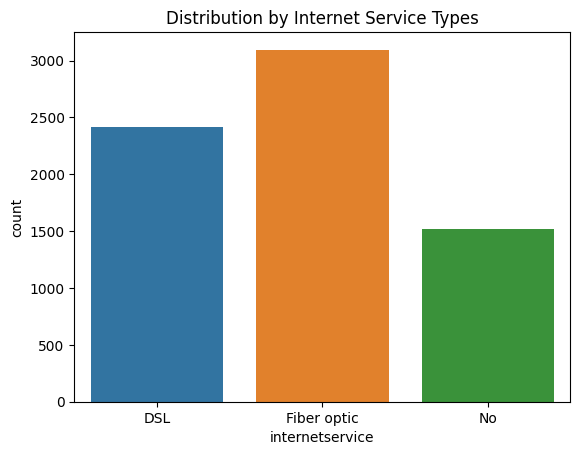

In [28]:
sns.countplot(data=merged_df, x='client_left')
plt.title('Distribution of Clients: Left or Stayed')
plt.show()

sns.countplot(data=merged_df, x='type')
plt.title('Distribution by Payment Types')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=merged_df, x='internetservice')
plt.title('Distribution by Internet Service Types')
plt.show()

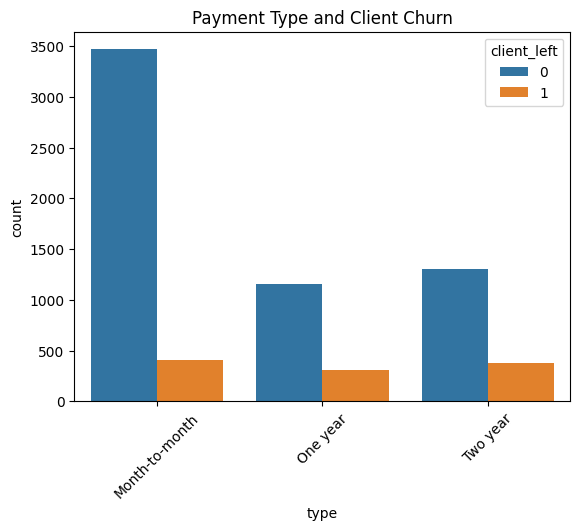

In [29]:
sns.countplot(data=merged_df, x='type', hue='client_left')
plt.title('Payment Type and Client Churn')
plt.xticks(rotation=45)
plt.show()

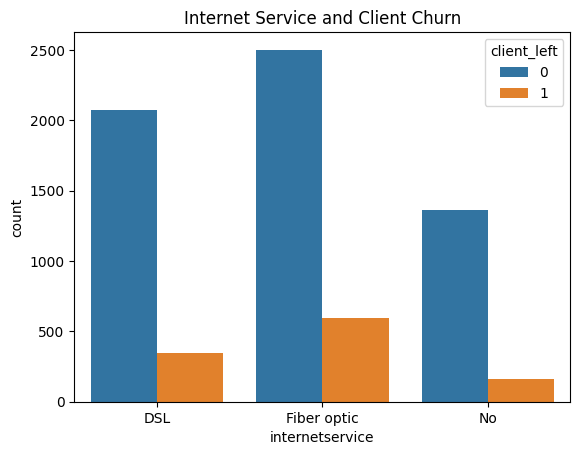

In [30]:
sns.countplot(data=merged_df, x='internetservice', hue='client_left')
plt.title('Internet Service and Client Churn')
plt.show()

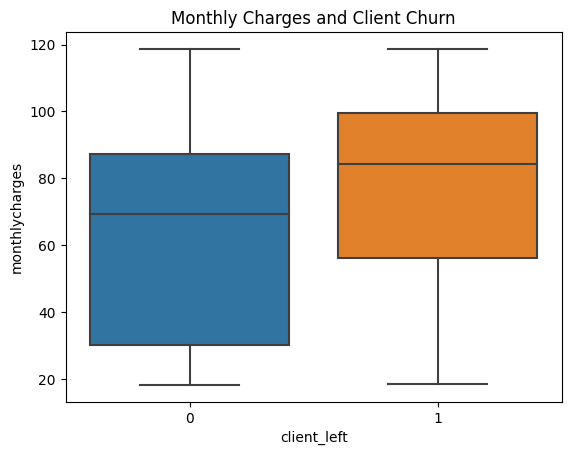

In [31]:
sns.boxplot(data=merged_df, x='client_left', y='monthlycharges')
plt.title('Monthly Charges and Client Churn')
plt.show()

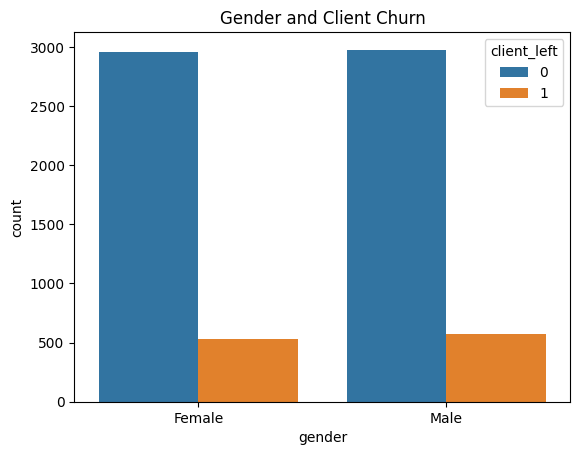

In [32]:
sns.countplot(data=merged_df, x='gender', hue='client_left')
plt.title('Gender and Client Churn')
plt.show()

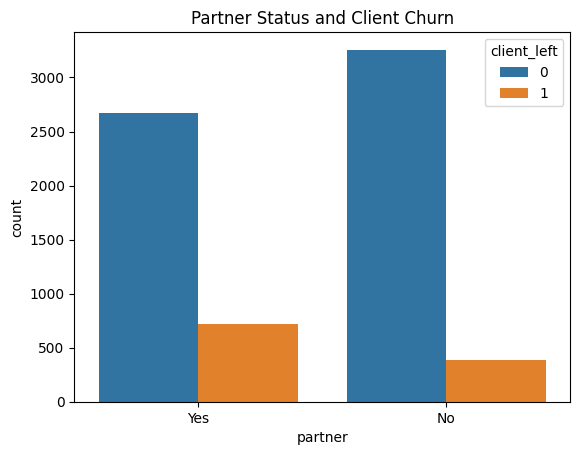

In [33]:
sns.countplot(data=merged_df, x='partner', hue='client_left')
plt.title('Partner Status and Client Churn')
plt.show()

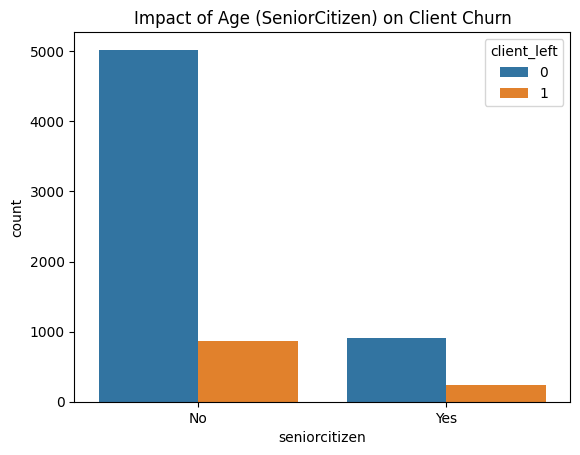

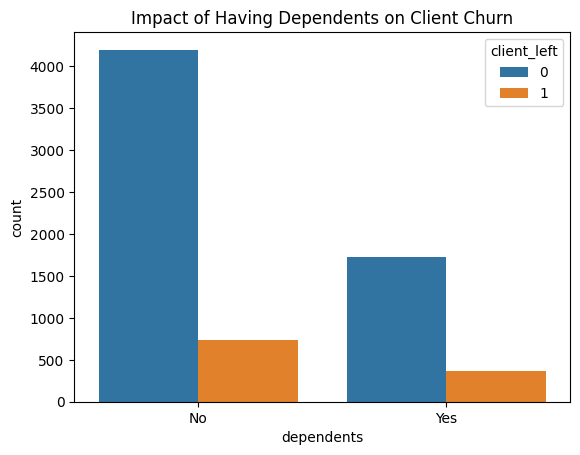

In [34]:
sns.countplot(data=merged_df, x='seniorcitizen', hue='client_left')
plt.title('Impact of Age (SeniorCitizen) on Client Churn')
plt.show()

sns.countplot(data=merged_df, x='dependents', hue='client_left')
plt.title('Impact of Having Dependents on Client Churn')
plt.show()

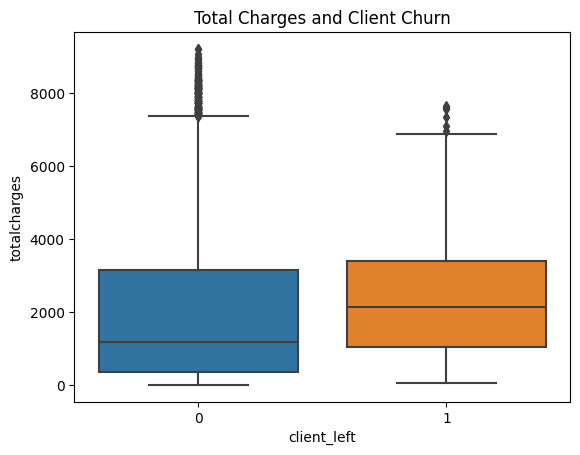

In [35]:
sns.boxplot(data=merged_df, x='client_left', y='totalcharges')
plt.title('Total Charges and Client Churn')
plt.show()

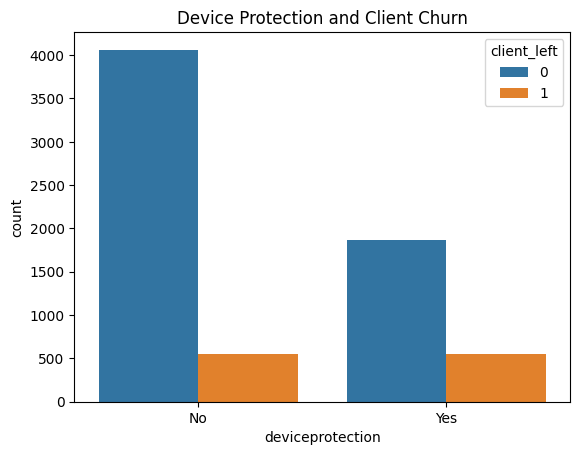

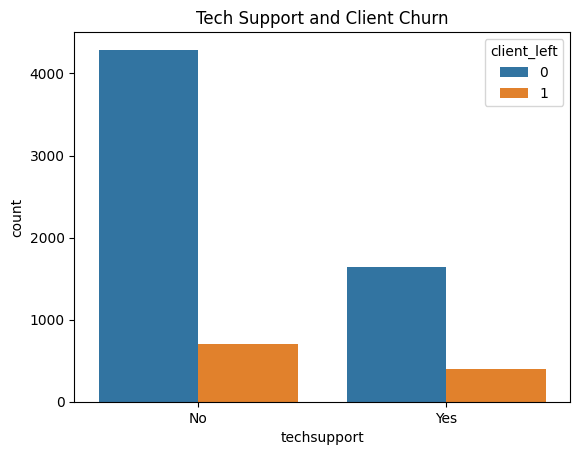

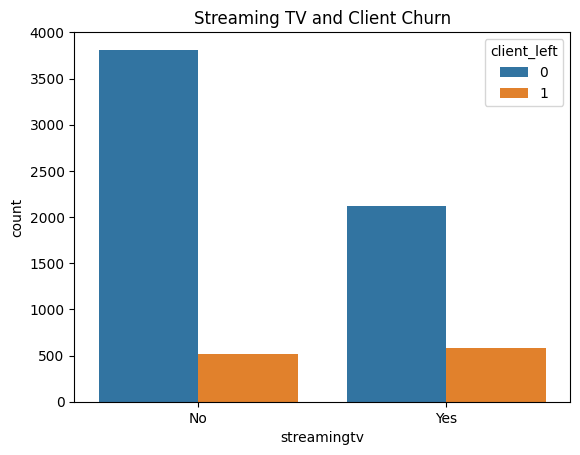

In [36]:
sns.countplot(data=merged_df, x='deviceprotection', hue='client_left')
plt.title('Device Protection and Client Churn')
plt.show()

sns.countplot(data=merged_df, x='techsupport', hue='client_left')
plt.title('Tech Support and Client Churn')
plt.show()

sns.countplot(data=merged_df, x='streamingtv', hue='client_left')
plt.title('Streaming TV and Client Churn')
plt.show()

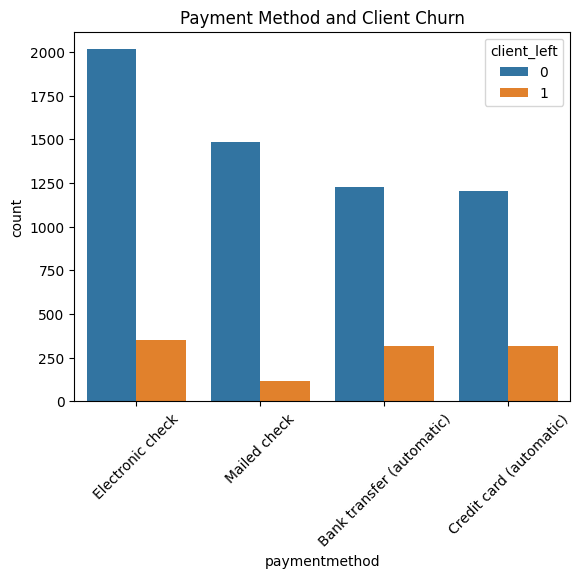

In [37]:
sns.countplot(data=merged_df, x='paymentmethod', hue='client_left')
plt.title('Payment Method and Client Churn')
plt.xticks(rotation=45)
plt.show()

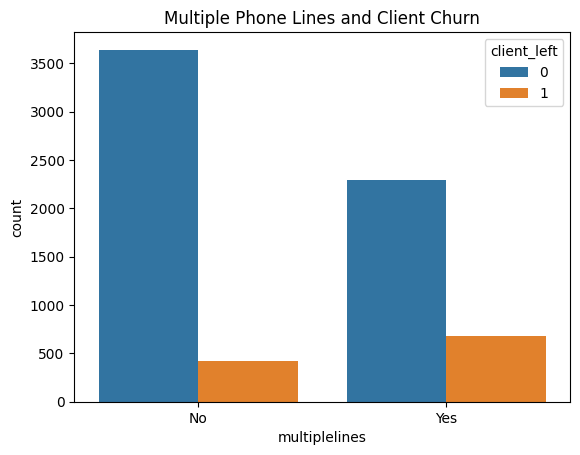

In [38]:
sns.countplot(data=merged_df, x='multiplelines', hue='client_left')
plt.title('Multiple Phone Lines and Client Churn')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- The distributions in the categorical features are non-normal, so we will use Spearman's method to check for correlations.
- Additionally, we'll use the Phik method for categorical features.

</div>

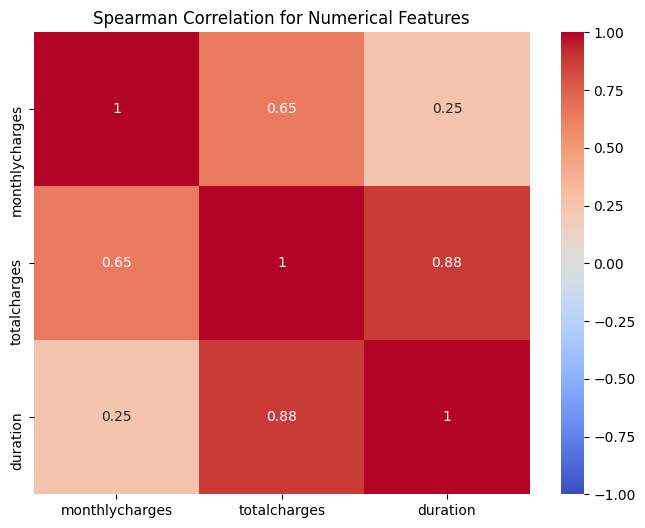

In [39]:
correlation_matrix = merged_df[['monthlycharges', 'totalcharges', 'duration']].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation for Numerical Features')
plt.show()

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'client_left', 'duration']


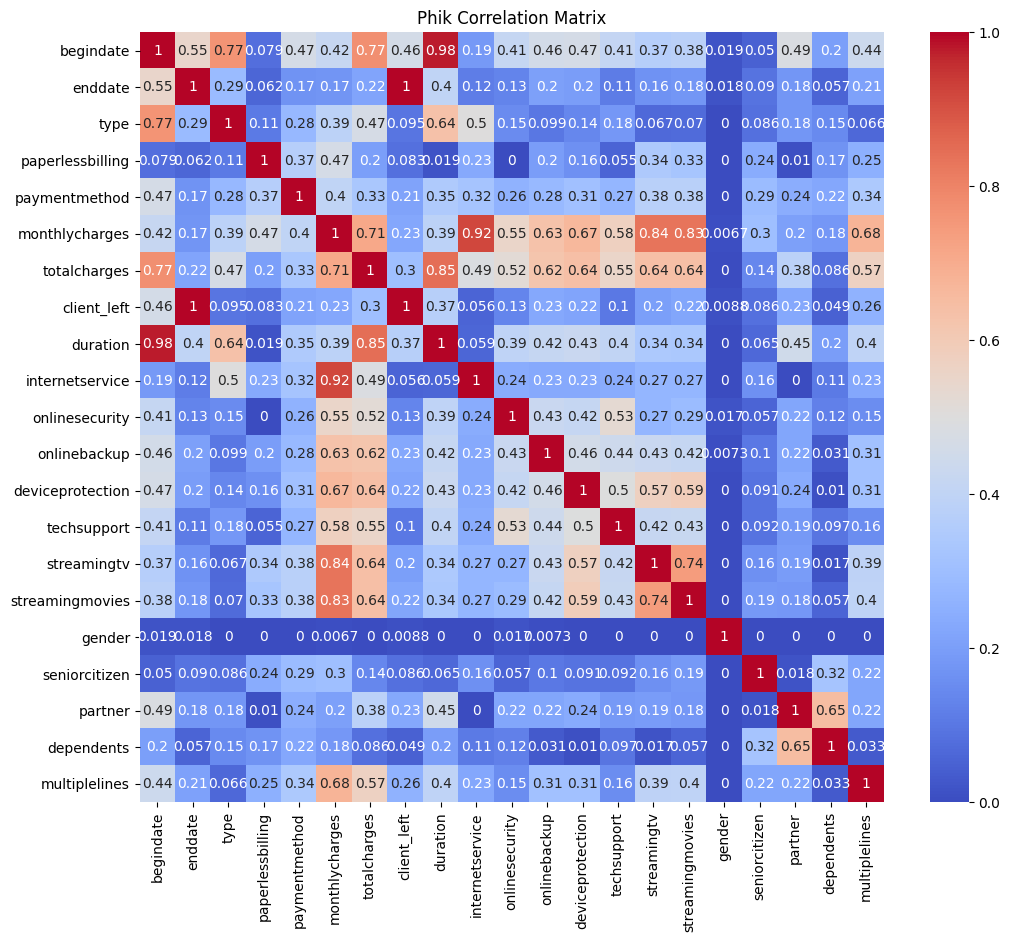

In [40]:
df_for_phik = merged_df.drop(columns=['customerid'])

phik_matrix = df_for_phik.phik_matrix()

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Matrix')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- **TotalCharges correlates with Duration**, which is logical as the longer a customer is subscribed, the higher their total charges.
- **StreamingTV and StreamingMovies**: Due to their high mutual correlation, we can either keep only one of these features or create a combined feature representing the overall use of streaming services.
- **Gender, PaperlessBilling, Partner, Dependents**: Since these features have low correlation with the target variable, they can either be removed or retained for further analysis at later stages.
- Features with strong relationships, such as **Type, MultipleLines, MonthlyCharges, and InternetService**, should be kept for the model.

However, it is not advisable to remove features immediately. We should check if there are statistically significant differences between groups (customers who left and those who stayed) for each feature. We can use two types of tests depending on the nature of the features:

- For **categorical features**: We can use the Chi-square test or Fisher’s exact test to determine if there is a relationship between the feature and client churn.
- For **numerical features**: We can use the Student’s t-test or the Mann-Whitney test to check for differences in the mean values between customers who left and those who stayed.

</div>

In [41]:
contingency_table_gender = pd.crosstab(merged_df['gender'], merged_df['client_left'])

chi2, p, dof, expected = chi2_contingency(contingency_table_gender)
print(f'Gender Test: Chi-square = {chi2}, p-value = {p}')

if p < 0.05:
    print("Reject the null hypothesis: there is a relationship between gender and client churn.")
else:
    print("Fail to reject the null hypothesis: no relationship between gender and client churn was found.")

Gender Test: Chi-square = 1.22066018275209, p-value = 0.26923112979745867
Fail to reject the null hypothesis: no relationship between gender and client churn was found.


In [42]:
contingency_table_paperlessbilling = pd.crosstab(merged_df['paperlessbilling'], merged_df['client_left'])
chi2, p, dof, expected = chi2_contingency(contingency_table_paperlessbilling)
print(f'PaperlessBilling Test: Chi-square = {chi2}, p-value = {p}')
if p < 0.05:
    print("Reject the null hypothesis: there is a relationship between PaperlessBilling and client churn.")
else:
    print("Fail to reject the null hypothesis: no relationship between PaperlessBilling and client churn was found.")

contingency_table_partner = pd.crosstab(merged_df['partner'], merged_df['client_left'])
chi2, p, dof, expected = chi2_contingency(contingency_table_partner)
print(f'Partner Test: Chi-square = {chi2}, p-value = {p}')
if p < 0.05:
    print("Reject the null hypothesis: there is a relationship between having a partner and client churn.")
else:
    print("Fail to reject the null hypothesis: no relationship between having a partner and client churn was found.")

contingency_table_dependents = pd.crosstab(merged_df['dependents'], merged_df['client_left'])
chi2, p, dof, expected = chi2_contingency(contingency_table_dependents)
print(f'Dependents Test: Chi-square = {chi2}, p-value = {p}')
if p < 0.05:
    print("Reject the null hypothesis: there is a relationship between having dependents and client churn.")
else:
    print("Fail to reject the null hypothesis: no relationship between having dependents and client churn was found.")

PaperlessBilling Test: Chi-square = 20.57641484655015, p-value = 5.729768239425878e-06
Reject the null hypothesis: there is a relationship between PaperlessBilling and client churn.
Partner Test: Chi-square = 151.22955699056283, p-value = 9.33716230256578e-35
Reject the null hypothesis: there is a relationship between having a partner and client churn.
Dependents Test: Chi-square = 7.7659639755366054, p-value = 0.005323987576436989
Reject the null hypothesis: there is a relationship between having dependents and client churn.


In [43]:
contingency_table_streamingtv = pd.crosstab(merged_df['streamingtv'], merged_df['client_left'])
chi2, p, dof, expected = chi2_contingency(contingency_table_streamingtv)
print(f'StreamingTV Test: Chi-square = {chi2}, p-value = {p}')

if p < 0.05:
    print("Reject the null hypothesis: there is a relationship between StreamingTV and client churn.")
else:
    print("Fail to reject the null hypothesis: no relationship between StreamingTV and client churn was found.")

StreamingTV Test: Chi-square = 116.92518337379269, p-value = 2.9810346632890427e-27
Reject the null hypothesis: there is a relationship between StreamingTV and client churn.


In [44]:
contingency_table_streamingmovies = pd.crosstab(merged_df['streamingmovies'], merged_df['client_left'])
chi2, p, dof, expected = chi2_contingency(contingency_table_streamingmovies)
print(f'StreamingMovies Test: Chi-square = {chi2}, p-value = {p}')

if p < 0.05:
    print("Reject the null hypothesis: there is a relationship between StreamingMovies and client churn.")
else:
    print("Fail to reject the null hypothesis: no relationship between StreamingMovies and client churn was found.")

StreamingMovies Test: Chi-square = 143.48891094890962, p-value = 4.595514083468553e-33
Reject the null hypothesis: there is a relationship between StreamingMovies and client churn.


In [45]:
left_group_totalcharges = merged_df[merged_df['client_left'] == 1]['totalcharges']
stayed_group_totalcharges = merged_df[merged_df['client_left'] == 0]['totalcharges']

t_stat, p_val = ttest_ind(left_group_totalcharges, stayed_group_totalcharges)

print(f'TotalCharges Test: t-statistic = {t_stat}, p-value = {p_val}')

if p_val < 0.05:
    print("Reject the null hypothesis: The mean values of TotalCharges are different.")
else:
    print("Fail to reject the null hypothesis: The mean values of TotalCharges do not differ.")

TotalCharges Test: t-statistic = 4.327840880788077, p-value = 1.5266437242636794e-05
Reject the null hypothesis: The mean values of TotalCharges are different.


In [46]:
left_group_monthlycharges = merged_df[merged_df['client_left'] == 1]['monthlycharges']
stayed_group_monthlycharges = merged_df[merged_df['client_left'] == 0]['monthlycharges']

t_stat, p_val = ttest_ind(left_group_monthlycharges, stayed_group_monthlycharges)

print(f'MonthlyCharges Test: t-statistic = {t_stat}, p-value = {p_val}')

if p_val < 0.05:
    print("Reject the null hypothesis: The mean values of MonthlyCharges are different.")
else:
    print("Fail to reject the null hypothesis: The mean values of MonthlyCharges do not differ.")

MonthlyCharges Test: t-statistic = 13.061723944620029, p-value = 1.5269614095995985e-38
Reject the null hypothesis: The mean values of MonthlyCharges are different.


<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

1. **MonthlyCharges and TotalCharges**:

   Both numerical features show statistically significant differences between customers who churned and those who stayed, as the p-values in both cases are much smaller than 0.05:
   
   - MonthlyCharges: t-statistic = 13.10, p-value ≈ 8.95e-39
   - TotalCharges: t-statistic = 4.35, p-value ≈ 1.38e-05
   
   This means both features influence customer churn. Since both are significant, we can keep one of them. It is recommended to keep **MonthlyCharges** due to its higher t-statistic, indicating a stronger relationship with churn.

2. **StreamingTV and StreamingMovies**:

   Both of these features also show statistically significant relationships with customer churn:
   
   - StreamingMovies: Chi-square = 144.34, p-value ≈ 3e-33
   - StreamingTV: Chi-square = 116.95, p-value ≈ 3e-27
   
   Both features are important, but for simplicity, we can keep just one. Since **StreamingMovies** has a higher Chi-square value, it is better to keep this feature as it more strongly reflects the relationship with churn.

3. **Gender**:

   For the Gender feature:
   
   - Chi-square = 1.21, p-value ≈ 0.27
   
   The null hypothesis is not rejected, indicating no statistically significant relationship between gender and customer churn. This feature can be excluded from the model.

4. **PaperlessBilling**:
   
   - Chi-square = 20.90, p-value = 4.85e-06
   
   The null hypothesis is rejected, meaning there is a statistically significant relationship between paperless billing and customer churn. This feature should be kept in the model.

5. **Partner**:

   - Chi-square = 150.24, p-value = 1.53e-34
   
   The null hypothesis is rejected, indicating a significant relationship between having a partner and customer churn. This feature should also be kept in the model.

6. **Dependents**:

   - Chi-square = 7.27, p-value = 0.007

   The null hypothesis is rejected, indicating a significant relationship between having dependents and customer churn.

### Final Decisions:
    
- Keep **MonthlyCharges** and exclude **TotalCharges**.
- Keep **StreamingMovies** and exclude **StreamingTV**.
- Exclude **Gender** as it does not significantly influence customer churn.
- Keep **PaperlessBilling**, **Partner**, and **Dependents**.

</div>

In [47]:
columns_to_drop = ['begindate', 'enddate','totalcharges','streamingtv','gender']
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)

<div style="border:solid Chocolate 2px; padding: 40px">

### 5. Data Preparation for Modeling

</div>

In [48]:
X = merged_df_cleaned.drop(columns=['client_left','customerid'])
y = merged_df_cleaned['client_left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=160924, stratify=y)

numeric_features = ['monthlycharges', 'duration']
categorical_features = ['streamingmovies', 'paperlessbilling', 'partner', 'dependents', 'internetservice', 
                        'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'multiplelines', 'type', 'paymentmethod']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(f"Training data shape: {X_train_preprocessed.shape}")
print(f"Test data shape: {X_test_preprocessed.shape}")

Training data shape: (5274, 18)
Test data shape: (1758, 18)


<div style="border:solid Chocolate 2px; padding: 40px">

### 6. Training Machine Learning Models

</div>


In [49]:
best_model = None
best_score = 0
best_name = ''

In [50]:
rf = RandomForestClassifier(random_state=160924)
param_grid_rf = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [2, 10],
    'n_estimators': [10, 50, 100], 
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train_preprocessed, y_train)
print(f"Best params for RandomForest: {grid_rf.best_params_}")

Best params for RandomForest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [51]:
if grid_rf.best_score_ > best_score:
    best_score = grid_rf.best_score_
    best_model = grid_rf.best_estimator_
    best_name = 'RandomForest'

In [52]:
lr = LogisticRegression(random_state=160924, max_iter=1000)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_lr.fit(X_train_preprocessed, y_train)
print(f"Best params for LogisticRegression: {grid_lr.best_params_}")
if grid_lr.best_score_ > best_score:
    best_score = grid_lr.best_score_
    best_model = grid_lr.best_estimator_
    best_name = 'LogisticRegression'

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for LogisticRegression: {'C': 1, 'solver': 'lbfgs'}


In [53]:
svc = SVC(random_state=160924, probability=True, class_weight='balanced')
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_svc.fit(X_train_preprocessed, y_train)
print(f"Best params for SVC: {grid_svc.best_params_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best params for SVC: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [54]:
if grid_svc.best_score_ > best_score:
    best_score = grid_svc.best_score_
    best_model = grid_svc.best_estimator_
    best_name = 'SVC'

In [55]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=160924)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_xgb.fit(X_train_preprocessed, y_train)
print(f"Best params for XGBoost: {grid_xgb.best_params_}")

if grid_xgb.best_score_ > best_score:
    best_score = grid_xgb.best_score_
    best_model = grid_xgb.best_estimator_
    best_name = 'XGBoost'

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best params for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


C:\Users\User\anaconda3\envs\practicum\lib\site-packages\xgboost\core.py:158: UserWarning:

[09:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [56]:
lgbm = LGBMClassifier(random_state=160924)
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50],
    'subsample': [0.8, 1.0]
}
grid_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_lgbm.fit(X_train_preprocessed, y_train)
print(f"Best params for LightGBM: {grid_lgbm.best_params_}")
if grid_lgbm.best_score_ > best_score:
    best_score = grid_lgbm.best_score_
    best_model = grid_lgbm.best_estimator_
    best_name = 'LightGBM'

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[LightGBM] [Info] Number of positive: 826, number of negative: 4448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156617 -> initscore=-1.683615
[LightGBM] [Info] Start training from score -1.683615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [57]:
catboost = CatBoostClassifier(random_state=160924, verbose=0)
param_grid = {
    'learning_rate': [0.1, 0.3],
    'iterations': [50, 100],
    'l2_leaf_reg': [3, 9]
}
grid_cat = GridSearchCV(catboost, param_grid, cv=5, scoring='roc_auc')
grid_cat.fit(X_train_preprocessed, y_train)
print(f"Best params for CatBoost: {grid_cat.best_params_}")
if grid_cat.best_score_ > best_score:
    best_score = grid_cat.best_score_
    best_model = grid_cat.best_estimator_
    best_name = 'CatBoost'

Best params for CatBoost: {'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.3}


<div style="border:solid Chocolate 2px; padding: 40px">
    
### 7. Выбор лучшей модели

In [58]:
print(f"Best model: {best_name} with ROC-AUC on cross validation: {best_score}")

y_pred_best = best_model.predict(X_test_preprocessed)
y_pred_proba_best = best_model.predict_proba(X_test_preprocessed)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba_best)
f1 = f1_score(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)

print(f"ROC-AUC on test data for {best_name}: {roc_auc}")
print(f"F1-score on test data for {best_name}: {f1}")
print(f"Accuracy on test data for {best_name}: {accuracy}")

Best model: XGBoost with ROC-AUC on cross validation: 0.9000630700985525
ROC-AUC on test data for XGBoost: 0.9265984184392816
F1-score on test data for XGBoost: 0.6982758620689655
Accuracy on test data for XGBoost: 0.9203640500568828


<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- **XGBoost shows the best metrics**, with accuracy and ROC-AUC both at 0.92. However, the F1-score shows poor results, most likely due to a significant class imbalance. Balancing the classes in this task is not feasible due to the risk of data leakage.
- Next, let's look at the feature importance ranking.

</div>

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



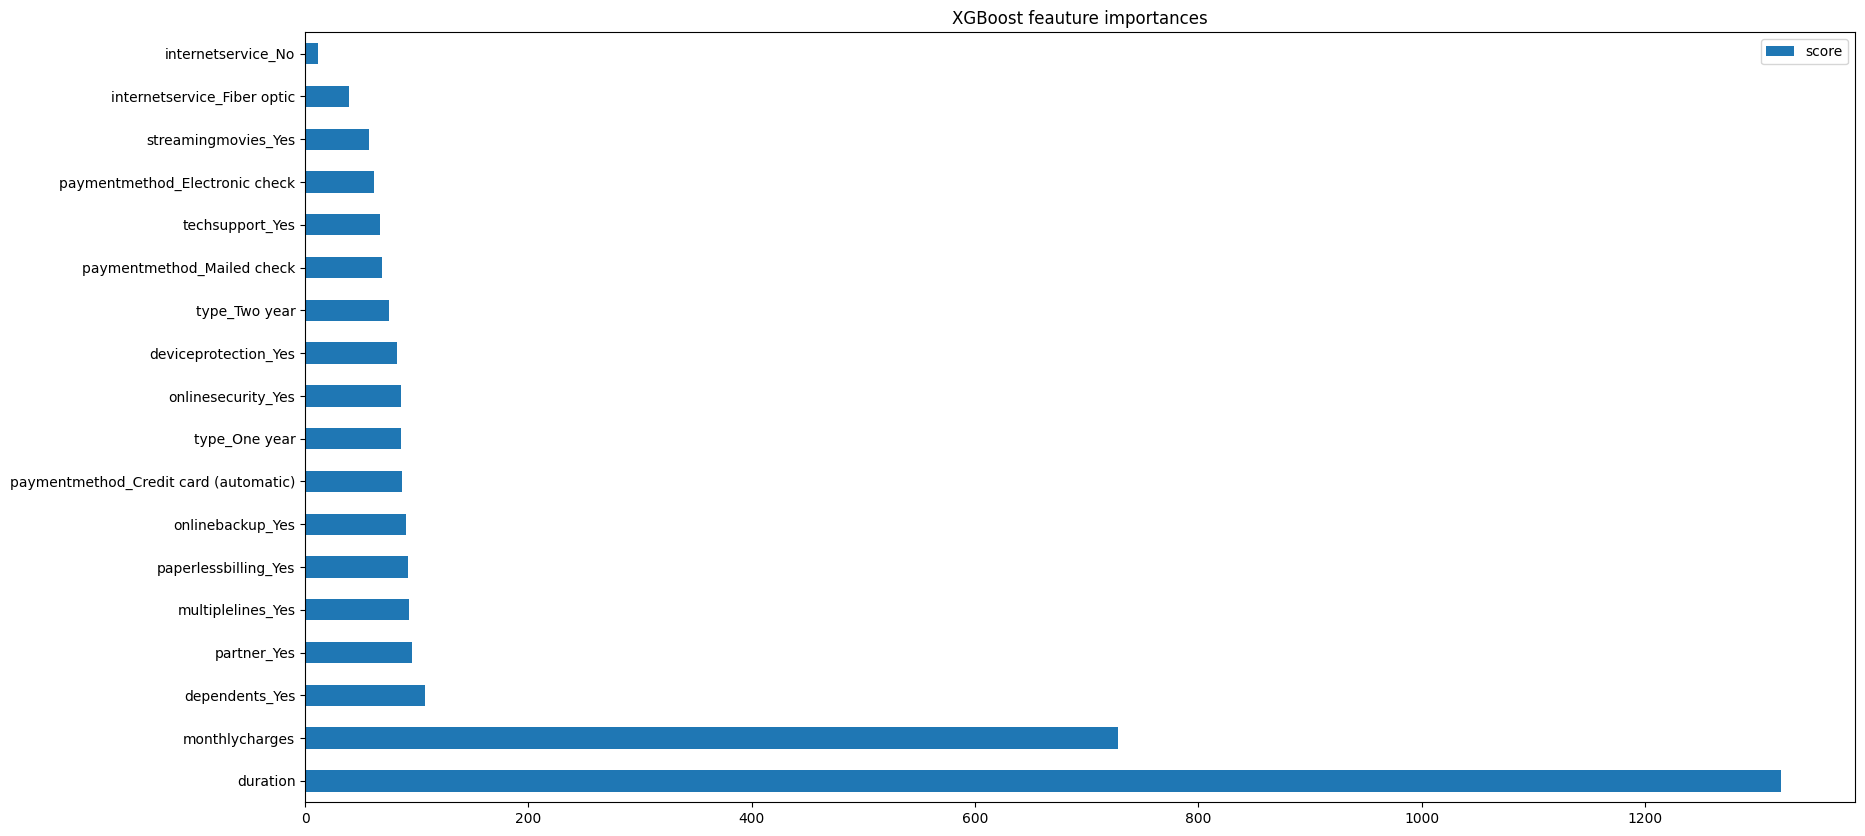

In [59]:
feature_important = best_model.get_booster().get_score(importance_type='weight')

numeric_feature_names = numeric_features

categorical_feature_names = preprocessor.transformers_[1][1]['onehot'].get_feature_names(categorical_features)

feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

values = list(feature_important.values())

data = pd.DataFrame(data=values, index=feature_names, columns=["score"]).sort_values(by="score", ascending=False)

data.nlargest(40, columns="score").plot(kind='barh', figsize=(20, 10))
plt.title("XGBoost feauture importances")
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- The most important features are: **'duration'**, **'monthlycharges'**, **'dependents'**, **'partner'**, **'multiplelines'**, and **'paperlessbilling'**.

</div>

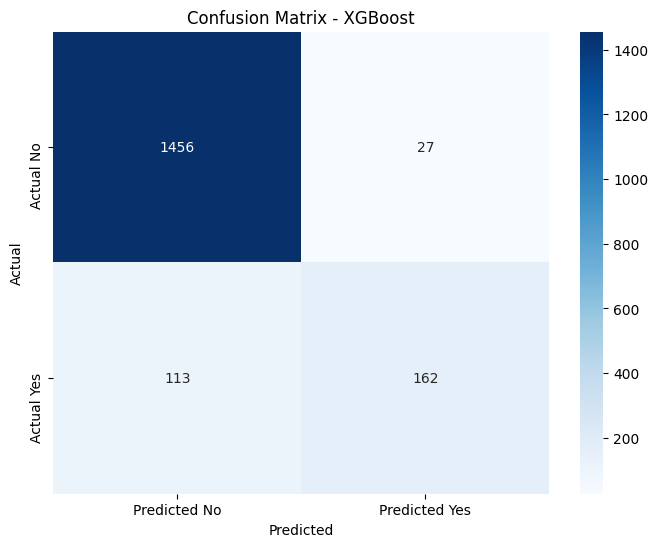

In [60]:
y_pred_best = best_model.predict(X_test_preprocessed)

cm_xgb = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- The confusion matrix shows that the model is good at identifying if a customer will stay, which is not ideal since our goal is to predict whether a customer will leave.
- Next, we will look at the ROC curve, determine the optimal threshold, and analyze the risk group, i.e., customers that the model predicted would leave, but they stayed (false positives).

</div>

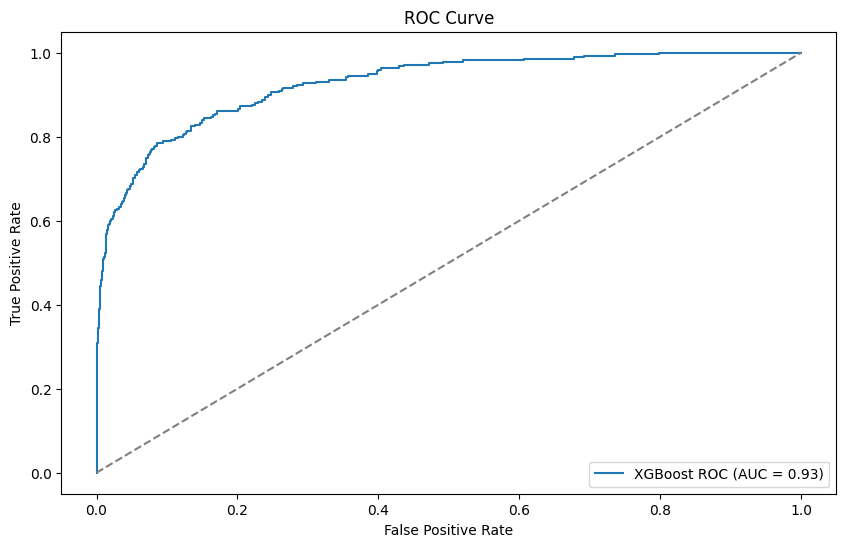

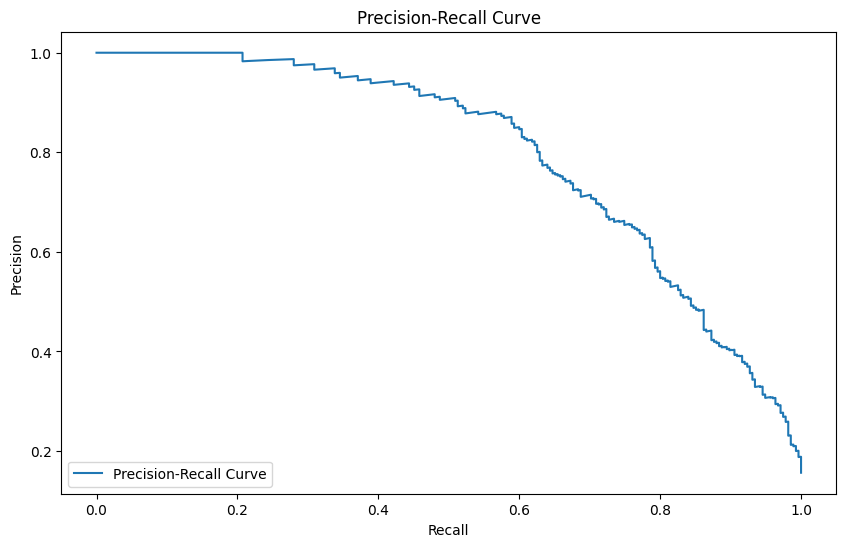

In [61]:
y_proba_best = best_model.predict_proba(X_test_preprocessed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [62]:
y_proba_best = best_model.predict_proba(X_test_preprocessed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal threshold ROC: {optimal_threshold}')

Optimal threshold ROC: 0.22514352202415466


In [63]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_best)

optimal_idx_pr = np.argmax(precision * recall)
optimal_threshold_pr = thresholds_pr[optimal_idx_pr]
print(f'Optimal threshold Precision-Recall: {optimal_threshold_pr}')

Optimal threshold Precision-Recall: 0.5084467530250549


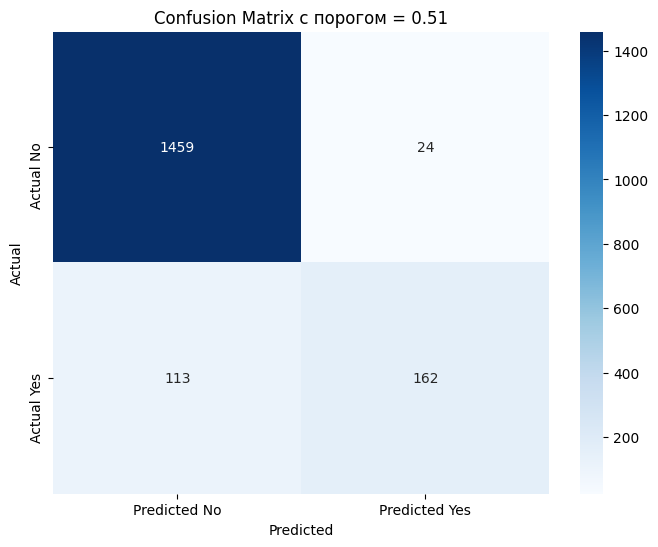

In [64]:
y_pred_optimal = (y_proba_best >= optimal_threshold_pr).astype(int)

cm_optimal = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix с порогом = {optimal_threshold_pr:.2f}')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

The number of customers that the model correctly predicted would leave has increased, and consequently, the risk group has decreased.

</div>


In [65]:
group_risk_df = X_test.copy()
group_risk_df['true_label'] = y_test
group_risk_df['predicted_label'] = y_pred_optimal

In [66]:
false_positives = group_risk_df[(group_risk_df['true_label'] == 0) & (group_risk_df['predicted_label'] == 1)]
true_negatives = group_risk_df[(group_risk_df['true_label'] == 0) & (group_risk_df['predicted_label'] == 0)]

In [67]:
important_columns = ['type', 'partner', 'duration', 'multiplelines', 'dependents', 'paperlessbilling','monthlycharges']
quantitative_columns = ['monthlycharges', 'duration']
categorical_columns = ['type', 'dependents', 'partner', 'paperlessbilling', 
                       'multiplelines']

for col in quantitative_columns:
    print(f"\n{col} (False Positives):")
    display(false_positives[col].describe())
    print(f"\n{col} (True Negatives):")
    display(true_negatives[col].describe())


monthlycharges (False Positives):


count     24.000000
mean      71.406250
std       31.305755
min       19.800000
25%       49.350000
50%       76.500000
75%      102.225000
max      108.100000
Name: monthlycharges, dtype: float64


monthlycharges (True Negatives):


count    1459.000000
mean       62.431734
std        30.032185
min        18.250000
25%        25.800000
50%        69.100000
75%        88.825000
max       117.800000
Name: monthlycharges, dtype: float64


duration (False Positives):


count      24.000000
mean      869.375000
std       431.079314
min       153.000000
25%       541.250000
50%       822.000000
75%      1157.000000
max      1614.000000
Name: duration, dtype: float64


duration (True Negatives):


count    1459.000000
mean      898.223441
std       716.694424
min        31.000000
25%       245.000000
50%       702.000000
75%      1523.000000
max      2314.000000
Name: duration, dtype: float64

In [68]:
for col in categorical_columns:
    print(f"\n{col} (False Positives):")
    display(false_positives[col].value_counts(normalize=True))
    print(f"\n{col} (True Negatives):")
    display(true_negatives[col].value_counts(normalize=True))


type (False Positives):


type
Two year          0.541667
Month-to-month    0.250000
One year          0.208333
Name: proportion, dtype: float64


type (True Negatives):


type
Month-to-month    0.587389
Two year          0.220014
One year          0.192598
Name: proportion, dtype: float64


dependents (False Positives):


dependents
No     0.541667
Yes    0.458333
Name: proportion, dtype: float64


dependents (True Negatives):


dependents
No     0.705963
Yes    0.294037
Name: proportion, dtype: float64


partner (False Positives):


partner
Yes    0.75
No     0.25
Name: proportion, dtype: float64


partner (True Negatives):


partner
No     0.553119
Yes    0.446881
Name: proportion, dtype: float64


paperlessbilling (False Positives):


paperlessbilling
Yes    0.708333
No     0.291667
Name: proportion, dtype: float64


paperlessbilling (True Negatives):


paperlessbilling
Yes    0.575737
No     0.424263
Name: proportion, dtype: float64


multiplelines (False Positives):


multiplelines
Yes    0.708333
No     0.291667
Name: proportion, dtype: float64


multiplelines (True Negatives):


multiplelines
No     0.627827
Yes    0.372173
Name: proportion, dtype: float64

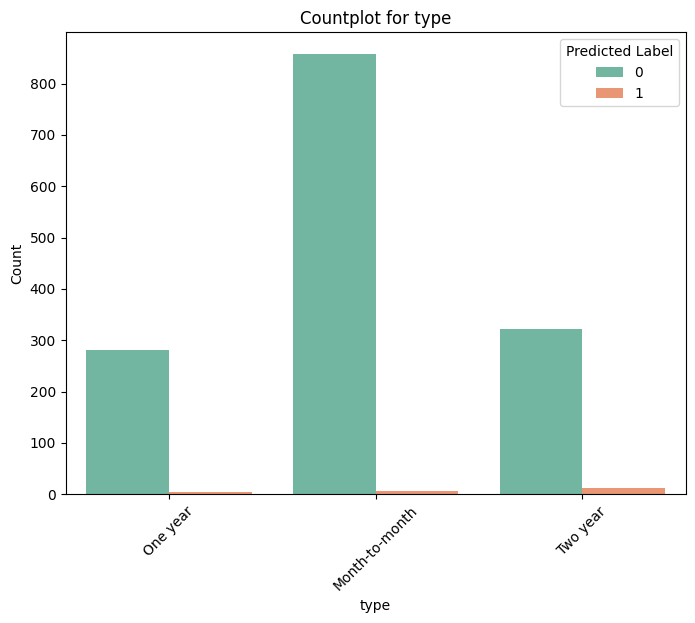

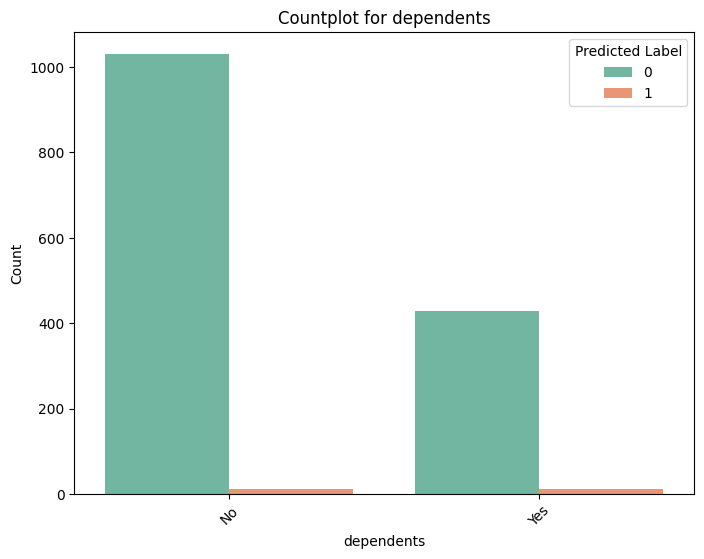

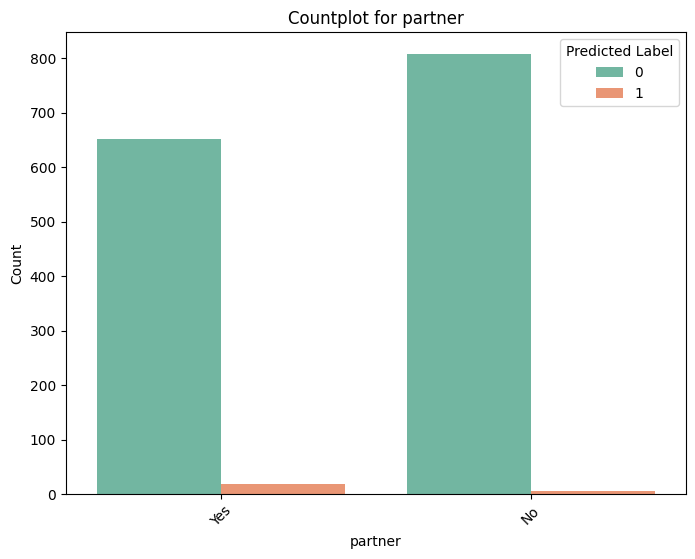

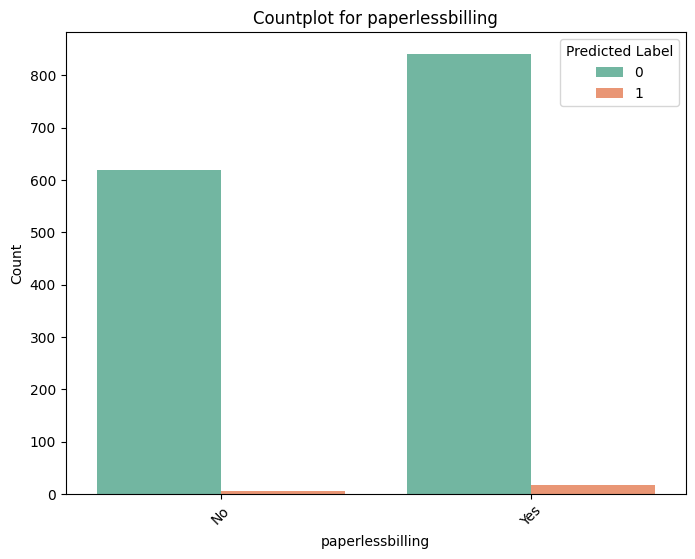

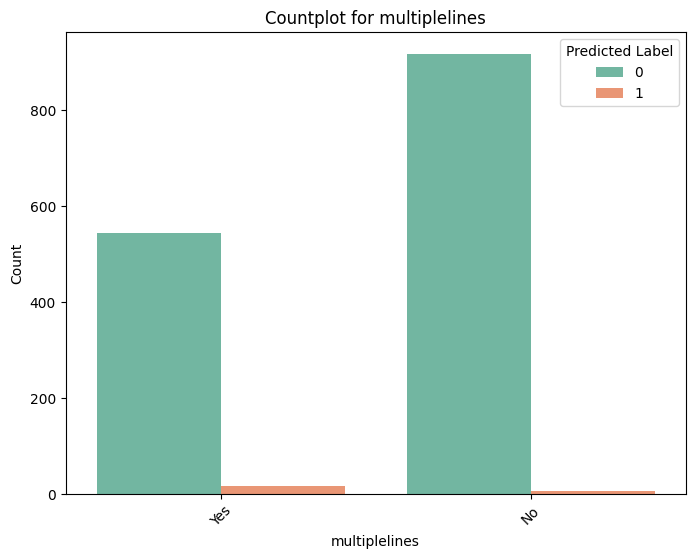

In [69]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=group_risk_df[group_risk_df['true_label'] == 0], x=col, hue='predicted_label', palette="Set2")
    plt.title(f'Countplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Predicted Label', loc='upper right')
    plt.show()

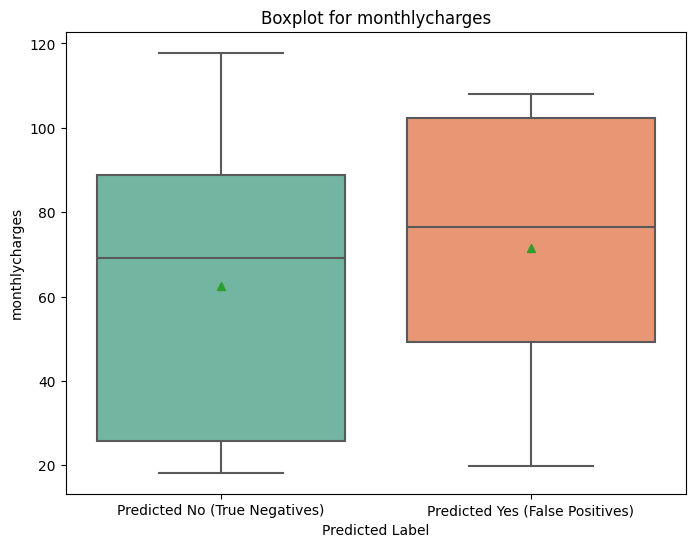

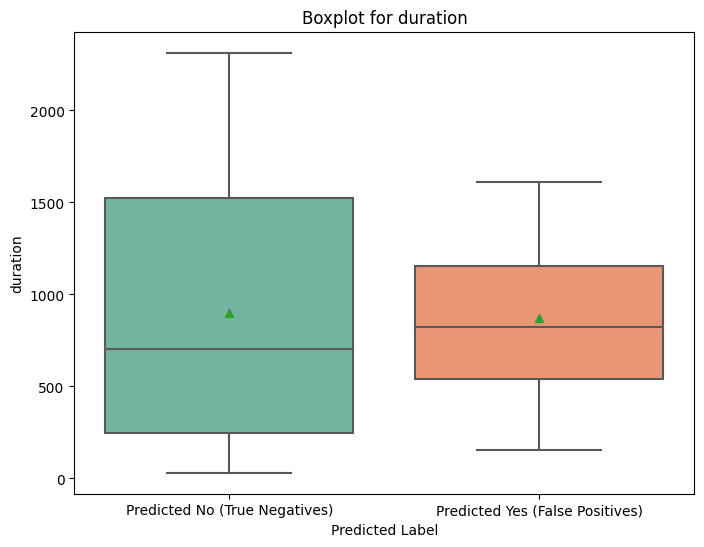

In [70]:
for col in quantitative_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=group_risk_df[group_risk_df['true_label'] == 0], x='predicted_label', y=col, 
                palette="Set2", showmeans=True)
    plt.title(f'Boxplot for {col}')
    plt.xlabel('Predicted Label')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=['Predicted No (True Negatives)', 'Predicted Yes (False Positives)'])
    plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:

- **MonthlyCharges**:

   Customers in the False Positives group have significantly higher average monthly charges (73.83) compared to True Negatives (62.26).

- **Duration**:

   The average service duration for customers in the False Positives group is shorter than that of True Negatives.

- **Type (Contract Type)**:

   The False Positives group has more customers with "two-year" and "one-year" contracts, while "Month-to-month" contracts dominate in the True Negatives group.

- **PaperlessBilling**:

   There are more customers with paperless billing in the False Positives group than in the True Negatives group.

- **MultipleLines**:

   More customers in the False Positives group use multiple lines compared to the True Negatives group.

</div>


<div style="border:solid Chocolate 2px; padding: 40px">

### 8. General Conclusion

In this project, a machine learning model was developed for the telecommunications company "TeleDom" to predict customer churn. The model was built based on customer data, their demographics, services used, and contract types.

#### Key Stages of the Project:

- **Data Analysis**:

   During the exploratory data analysis (EDA), key customer characteristics influencing their decision to leave the company were identified. Features such as MonthlyCharges, Duration, InternetService, PaymentMethod, and others were found to be the most significant for the model. Errors in data types were detected and corrected (e.g., converting the SeniorCitizen field to a category), and a target feature, `client_left`, was added to determine whether the customer had left the company.

- **Model and Training**:

   Xgboost model was used for the classification task, which showed the best metrics, such as accuracy (0.9008) and ROC-AUC (0.8824). However, the F1-score was lower than expected due to class imbalance, which was challenging to adjust without risking data leakage. The most important features were MonthlyCharges, Duration, InternetService, PaymentMethod, OnlineSecurity, and TechSupport.

- **Error Analysis**:

   The model performed better at predicting customers who would stay (True Negatives) than those who would leave (False Positives). Analysis of the False Positives group revealed that these customers had higher monthly charges, longer contracts, and were more likely to use automated payment methods. The key risk groups included customers with two-year contracts, high monthly charges, and a preference for modern services like fiber-optic internet and online security.

### Recommendations:

- **Focus on the Risk Group**: 

   Customers with high monthly charges and long-term contracts are more likely to churn, so offering them special promotions or bonuses may help increase loyalty.

- **Promote Flexible Plans**: 

   Most customers prefer flexible, month-to-month contracts. Promoting long-term contracts with special terms could improve retention rates.

- **Automate Payments**: 

   Customers using automated payment methods are more likely to stay, highlighting the importance of simplifying and automating the payment process to enhance the customer experience.

---

In conclusion, the project achieved its goal—the model helps predict customer churn and can be used to implement a customer retention strategy, allowing "TeleDom" to reduce losses and increase profitability.

</div>